<a href="https://colab.research.google.com/github/Maureen-Ch/NYC_City_Bike_Trip/blob/main/NYC_City_Bike_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mamaggie/TutorialProjects/refs/heads/main/data/citi_bike_trip_data.csv')

In [ ]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [ ]:
df.shape

(40575, 15)

In [ ]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,40.735229,-73.991093,450.073370,40.734885,-73.991212,17634.191547,1.137671
std,984.000376,362.462577,0.019599,0.012346,369.780126,0.019600,0.012483,1703.451047,0.527477
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14531.000000,0.000000
25%,408.000000,306.000000,40.721816,-74.000264,305.000000,40.721816,-74.001497,16146.000000,1.000000
50%,638.000000,405.000000,40.737050,-73.990765,404.000000,40.736529,-73.990931,17651.000000,1.000000
75%,1028.000000,487.000000,40.750450,-73.982050,487.000000,40.750224,-73.982050,19093.000000,1.000000
max,56629.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,2.000000


<Axes: xlabel='tripduration', ylabel='Count'>

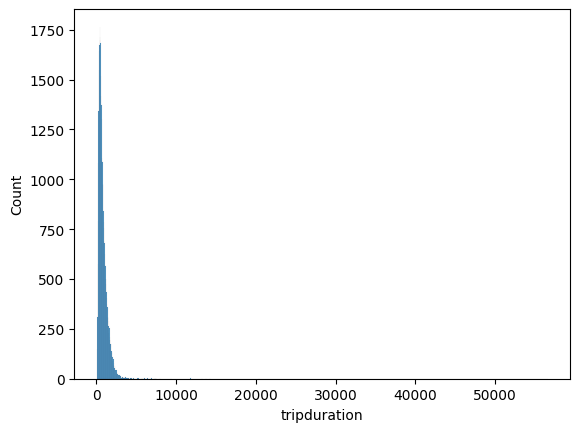

In [ ]:
sns.histplot(df['tripduration'])

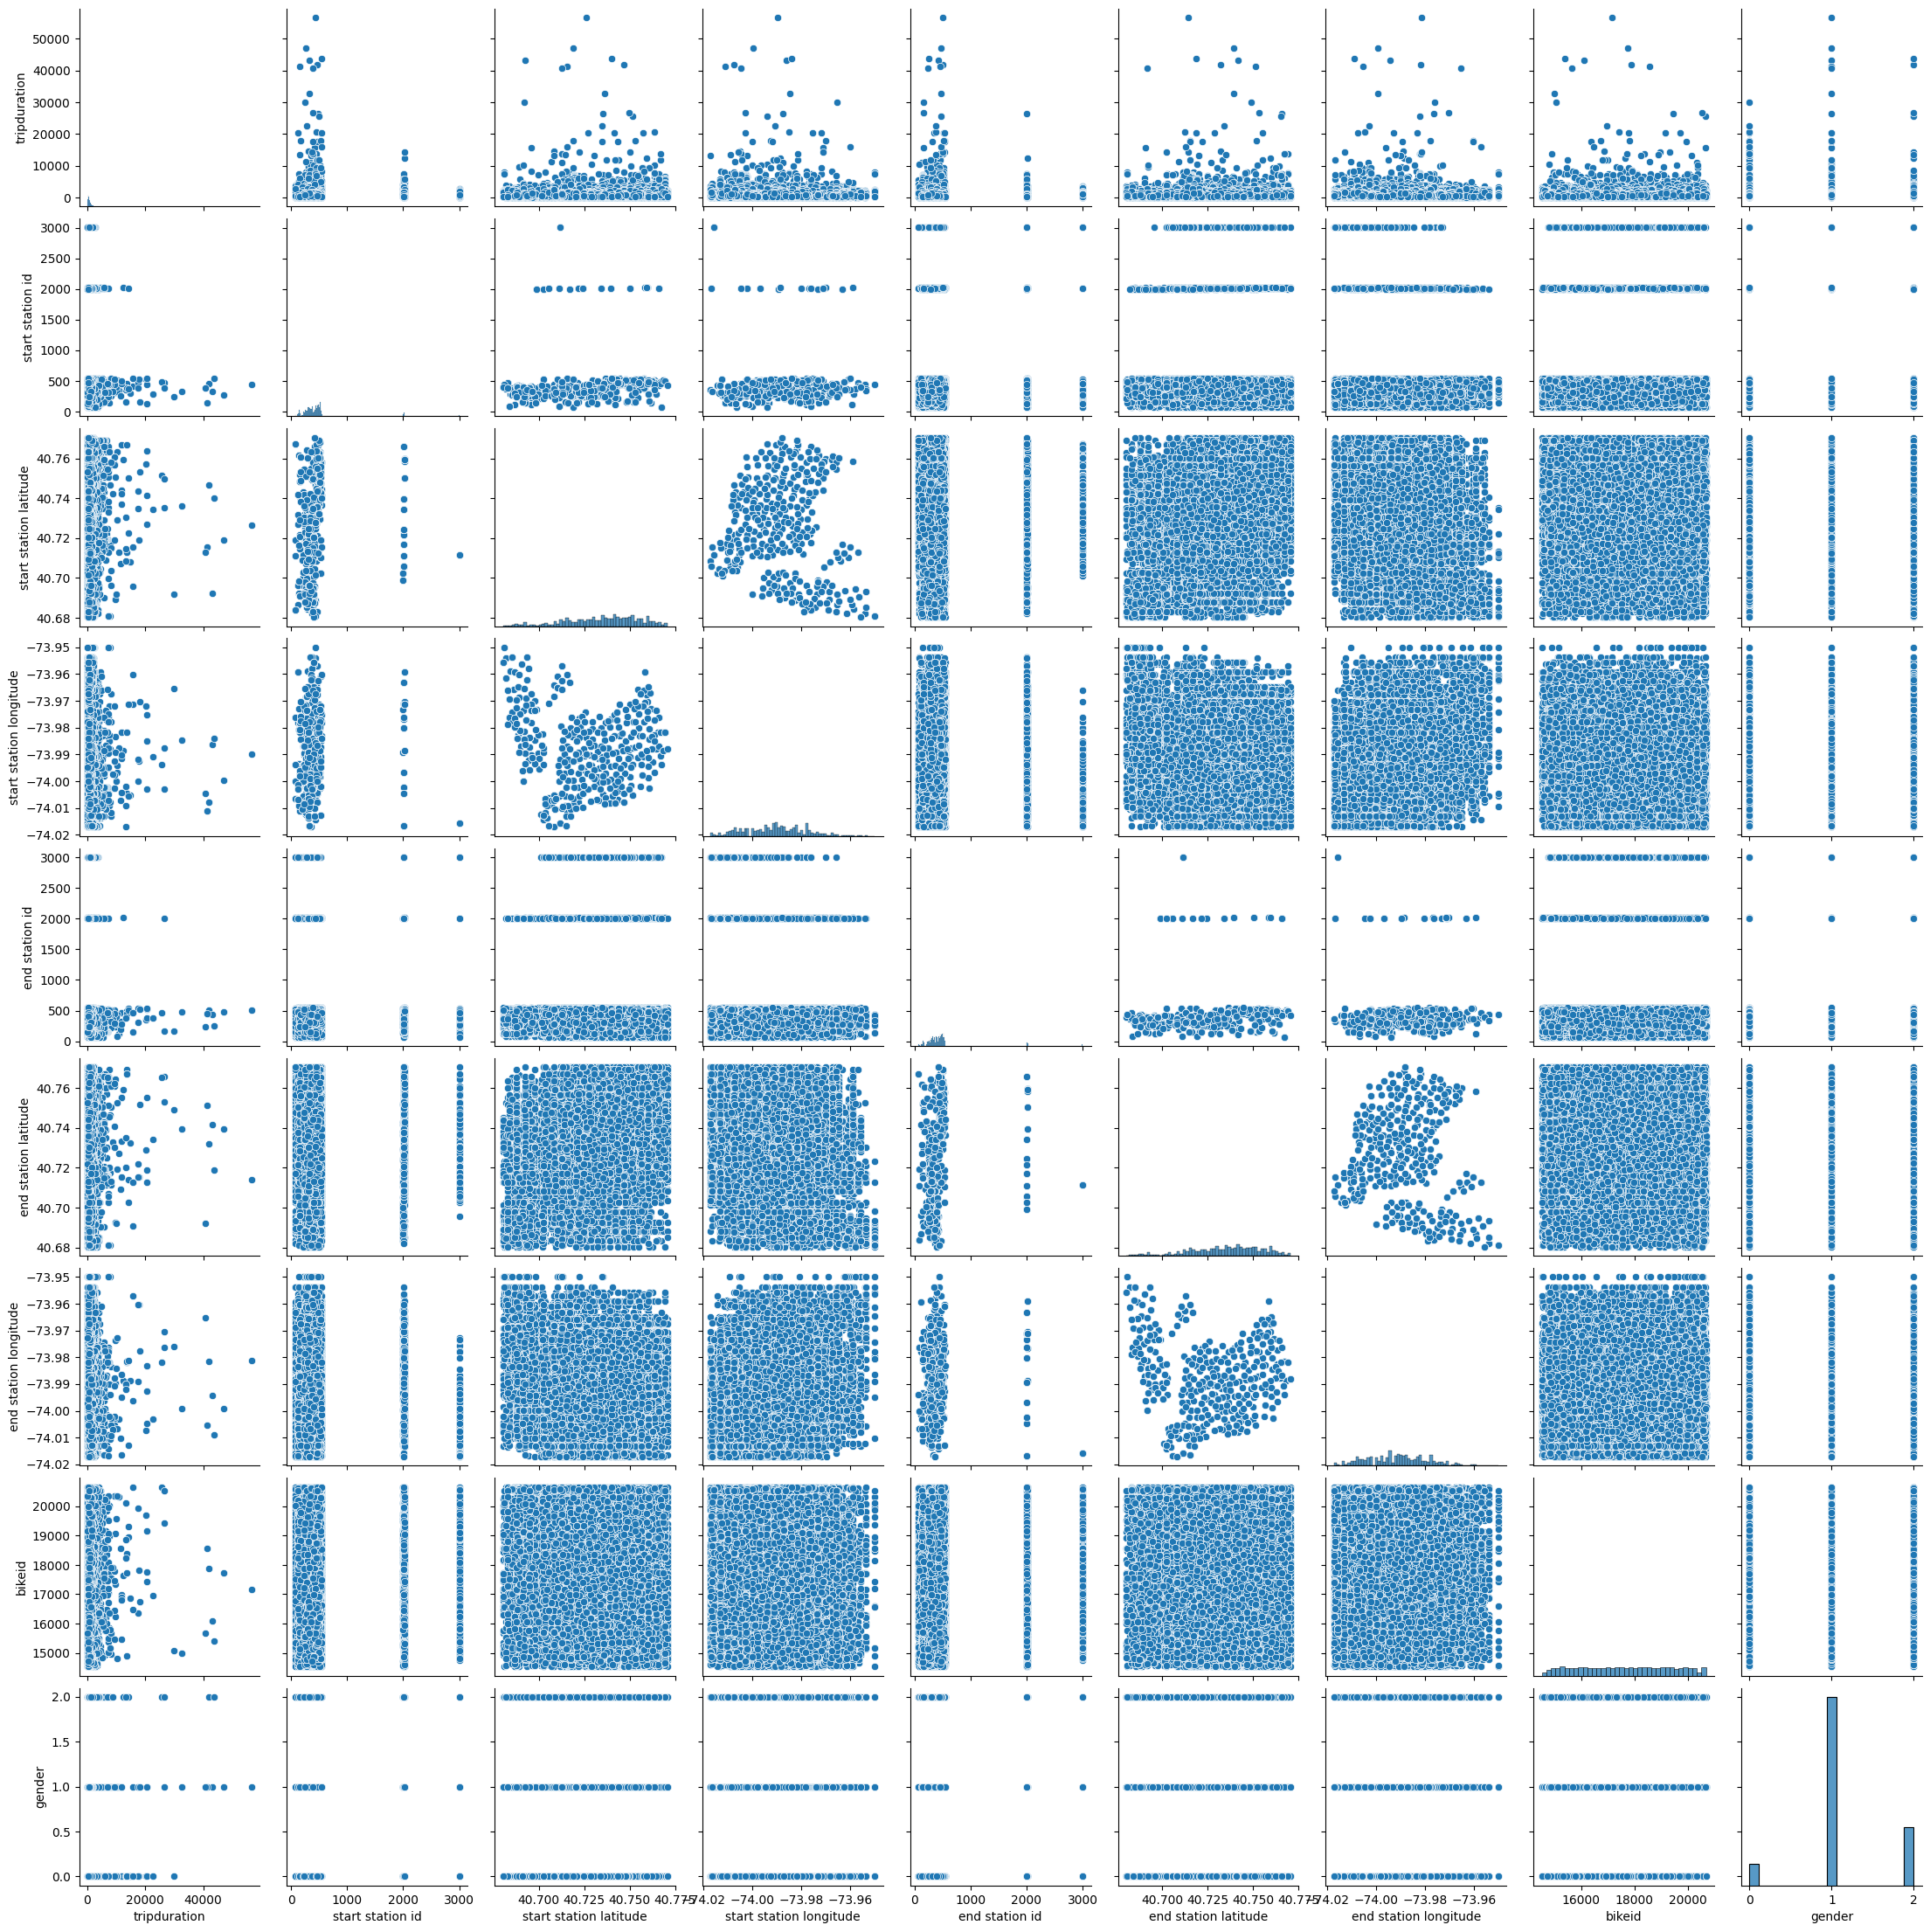

In [ ]:
sns.pairplot(df)

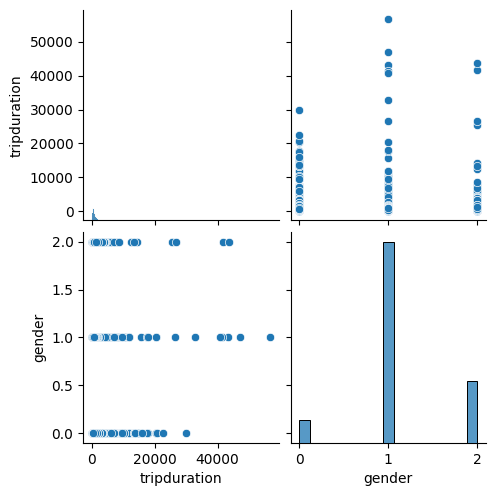

In [ ]:
sns.pairplot(df[['tripduration','gender']])

How many % users are subscribers ?

In [ ]:
num_subscriber = df['usertype'].loc[df['usertype']== 'Subscriber'].count()
total = len(df)
print(round(num_subscriber/total*100, 2), '% of total on October 1st,2013 is annual subscribers')

92.03 % of total on October 1st,2013 is annual subscribers


### How does trip length vary based on trip start time ?

In [ ]:
df['hour'] = df.starttime.apply(lambda x:x[11:13]).astype('str')

<Axes: xlabel='hour', ylabel='tripduration'>

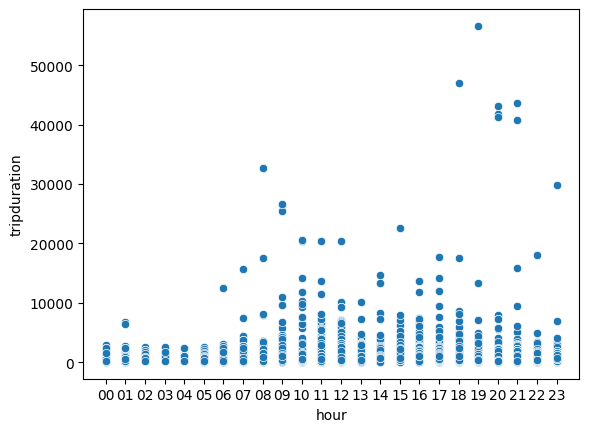

In [ ]:
#visualize correlation
sns.scatterplot(x = 'hour', y = 'tripduration', data = df)

In [ ]:
#On remarque que les trajet sont plus long entre 7h-12h et 17h-20h.

<Axes: xlabel='hour', ylabel='tripduration'>

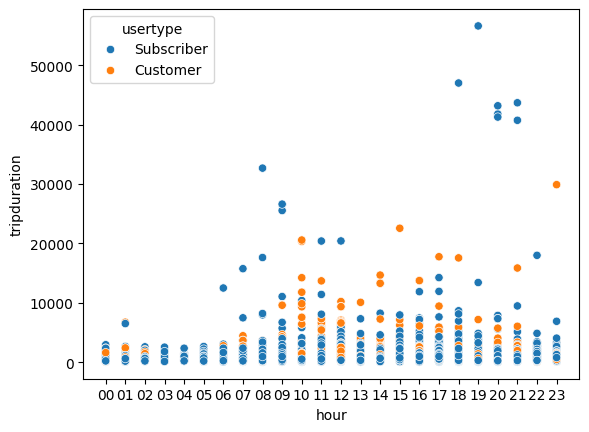

In [ ]:
sns.scatterplot(x = 'hour', y = 'tripduration', data = df, hue = 'usertype')

In [ ]:
# subscribers take longer trip than non-subscribers.

### Which bike stations are more popular to start trips from ?

In [ ]:
df2 = df.groupby(['start station id']).size().reset_index(name = 'counts')

In [ ]:
df2

,start station id,counts
0,72,112
1,79,91
2,82,39
3,83,52
4,116,213
...,...,...
323,2017,127
324,2021,228
325,2022,105
326,2023,74


In [ ]:
temp = df.drop_duplicates('start station id')
#left join
df2 = pd.merge(df2, temp[['start station id', 'start station name', 'start station latitude','start station longitude']],
how = 'left', on =['start station id'])

In [ ]:
df2

,start station id,counts,start station name,start station latitude,start station longitude
0,72,112,W 52 St & 11 Ave,40.767272,-73.993929
1,79,91,Franklin St & W Broadway,40.719116,-74.006667
2,82,39,St James Pl & Pearl St,40.711174,-74.000165
3,83,52,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,213,W 17 St & 8 Ave,40.741776,-74.001497
...,...,...,...,...,...
323,2017,127,E 43 St & 2 Ave,40.750224,-73.971214
324,2021,228,W 45 St & 8 Ave,40.759291,-73.988597
325,2022,105,E 59 St & Sutton Pl,40.758491,-73.959206
326,2023,74,E 55 St & Lexington Ave,40.759681,-73.970314


## Visualization

In [ ]:
import folium

In [ ]:
#initialize map
m = folium.Map(location = [40.767272 , -73.993929], tiles = 'OpenStreetMap', zoom_start= 12)

In [ ]:
m

In [ ]:
for i in range(0, len(df2)):
  folium.Circle(
      location = [df.loc[i]['start station latitude'], df.loc[i]['start station longitude']],
      popup = df2.loc[i]['start station name'],
      radius = float(df2.loc[i]['counts'])/2,
      color = 'red',
      fill = True, fill_color = 'red'
  ).add_to(m)

In [ ]:
m